In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("1.03. Dummies.csv")

In [3]:
df.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [5]:
df["Attendance"] = df["Attendance"].map({"Yes":1, "No":0})
df

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [6]:
#regression
y = df["GPA"]
x1 = df[["SAT","Attendance"]]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.19e-15
Time:                        04:32:32   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
yhat = 0.275 + 0.0017 * df["SAT"] #from previous example or by dropping attendance column in df
yhat_no = 0.6439 + 0.0014 * df["SAT"]
yhat_yes = 0.6439 + 0.0014 * df["SAT"] + 0.2226

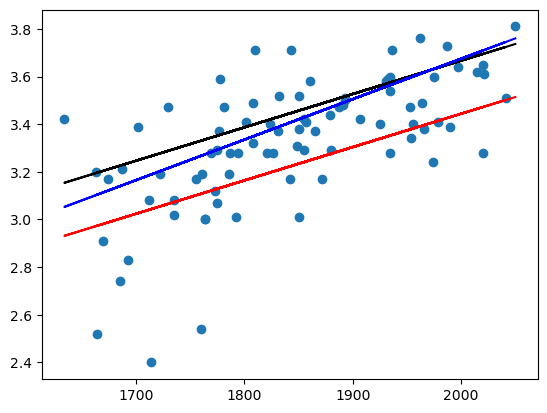

In [9]:
plt.scatter(df["SAT"],df["GPA"])
plt.plot(df["SAT"],yhat_no, c= "red")
plt.plot(df["SAT"],yhat_yes, c= "black")
plt.plot(df["SAT"],yhat, c= "blue")
plt.show()

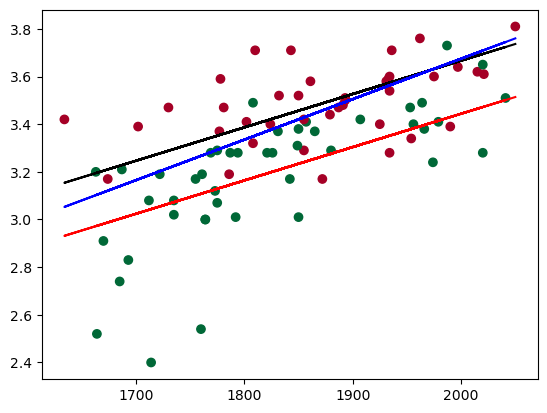

In [10]:
#coloring the scatter points
plt.scatter(df["SAT"],df["GPA"], c=df["Attendance"], cmap="RdYlGn_r")
plt.plot(df["SAT"],yhat_no, c= "red")
plt.plot(df["SAT"],yhat_yes, c= "black")
plt.plot(df["SAT"],yhat, c= "blue")
plt.show()